<a href="https://colab.research.google.com/github/DarshanaHeendeniya/ML_Learning/blob/main/AccidentRiskPredictionNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Importing required packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error

In [17]:
# Importing Datasets
df_train = pd.read_csv('/train.csv')
df_test = pd.read_csv('/test.csv')

In [18]:
# Explore datasets
df_train.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [19]:
df_test.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [20]:
# Resetting indexes
df_train.set_index('id', inplace=True)
df_test.set_index('id', inplace=True)

In [21]:
# Checking for null values
df_train.isnull().sum()

,0
road_type,0
num_lanes,0
curvature,0
speed_limit,0
lighting,0
weather,0
road_signs_present,0
public_road,0
time_of_day,0
holiday,0


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517754 entries, 0 to 517753
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   road_type               517754 non-null  object 
 1   num_lanes               517754 non-null  int64  
 2   curvature               517754 non-null  float64
 3   speed_limit             517754 non-null  int64  
 4   lighting                517754 non-null  object 
 5   weather                 517754 non-null  object 
 6   road_signs_present      517754 non-null  bool   
 7   public_road             517754 non-null  bool   
 8   time_of_day             517754 non-null  object 
 9   holiday                 517754 non-null  bool   
 10  school_season           517754 non-null  bool   
 11  num_reported_accidents  517754 non-null  int64  
 12  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(2), int64(3), object(4)
memory usage: 41.5+ MB


In [23]:
# Identifying features and target
X = df_train.drop('accident_risk', axis=1)
y = df_train['accident_risk']

In [24]:
X.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
id,,,,,,,,,,,,
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1


In [25]:
# Splitting training and validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [26]:
X_train.head()



,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
id,,,,,,,,,,,,
456243,urban,4,0.25,60,dim,clear,True,False,evening,True,True,2
156017,highway,4,0.49,60,daylight,rainy,False,False,afternoon,False,True,0
222220,rural,4,0.68,60,daylight,foggy,False,False,morning,True,False,2
194984,highway,4,0.84,60,daylight,rainy,False,True,afternoon,False,False,3
293934,rural,4,0.68,45,daylight,rainy,False,False,afternoon,True,True,1


In [27]:
# Apply Ordinal Encoding to Columns with boolian values
bool_cols = ['road_signs_present', 'public_road', 'holiday', 'school_season']
ord_encoder = OrdinalEncoder()
X_train[bool_cols] = ord_encoder.fit_transform(X_train[bool_cols])
X_val[bool_cols] = ord_encoder.transform(X_val[bool_cols])

In [28]:
X_train.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
id,,,,,,,,,,,,
456243,urban,4,0.25,60,dim,clear,1.0,0.0,evening,1.0,1.0,2
156017,highway,4,0.49,60,daylight,rainy,0.0,0.0,afternoon,0.0,1.0,0
222220,rural,4,0.68,60,daylight,foggy,0.0,0.0,morning,1.0,0.0,2
194984,highway,4,0.84,60,daylight,rainy,0.0,1.0,afternoon,0.0,0.0,3
293934,rural,4,0.68,45,daylight,rainy,0.0,0.0,afternoon,1.0,1.0,1


In [29]:
# Applying OneHot Encoding to road_type, lighting, weather and time_of_day columns
OH_encoder = OneHotEncoder(handle_unknown='ignore')
encoded_cols_train = OH_encoder.fit_transform(X_train[['road_type', 'lighting', 'weather', 'time_of_day']])
encoded_col_val = OH_encoder.transform(X_val[['road_type', 'lighting', 'weather', 'time_of_day']])
temp_col = OH_encoder.get_feature_names_out(input_features = ['road_type', 'lighting', 'weather', 'time_of_day'])

df_X_train = pd.DataFrame(encoded_cols_train.toarray(), columns = temp_col)
df_X_val = pd.DataFrame(encoded_col_val.toarray(), columns = temp_col)

df_X_train.index = X_train.index
df_X_val.index = X_val.index

# Droping encoded columns from X_train and X_val
X_train.drop(['road_type', 'lighting', 'weather', 'time_of_day'], axis=1, inplace=True)
X_val.drop(['road_type', 'lighting', 'weather', 'time_of_day'], axis=1, inplace=True)

# Creating the final dataset for model training
df_X_train = pd.concat([X_train, df_X_train], axis=1)
df_X_val = pd.concat([X_val, df_X_val], axis=1)

df_X_train.columns = df_X_train.columns.astype(str)
df_X_val.columns = df_X_val.columns.astype(str)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Minimum validation loss: 0.0443


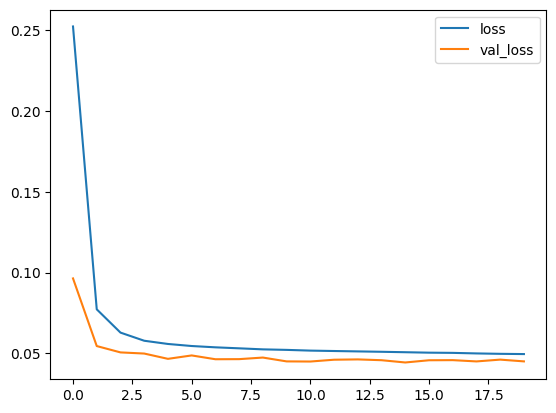

In [30]:
# Creating a neural network
model = keras.Sequential([
    layers.Dense(512, activation = 'swish', input_shape = [df_X_train.shape[1]]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation = 'swish'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(128, activation = 'swish'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation = 'swish'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(32, activation = 'swish'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1)
])

# Optimizing the network
model.compile(optimizer='adam', loss='mae')

# Adding early stopping to the model
early_stopping = EarlyStopping(min_delta = 0.001, patience = 10, restore_best_weights = True)

# Training the model
history = model.fit(df_X_train, y_train, validation_data=(df_X_val, y_val), batch_size = 1000, epochs = 5000, callbacks = [early_stopping], verbose = 0)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {:0.4f}".format(history_df['val_loss'].min()))

In [31]:
# Preprocessing test data

# Applying ordinal encoding to columns with boolian values

df_test[bool_cols] = ord_encoder.transform(df_test[bool_cols])

# Applying OneHot Encoding to road_type, lighting, weather and time_of_day columns
encoded_cols_test = OH_encoder.transform(df_test[['road_type', 'lighting', 'weather', 'time_of_day']])
temp_col = OH_encoder.get_feature_names_out(input_features = ['road_type', 'lighting', 'weather', 'time_of_day'])
df_X_test = pd.DataFrame(encoded_cols_test.toarray(), columns = temp_col)

df_X_test.index = df_test.index
df_test.drop(['road_type', 'lighting', 'weather', 'time_of_day'], axis=1, inplace=True)

# Creating the final dataset for model training
df_X_test = pd.concat([df_test, df_X_test], axis=1)
df_X_test.columns = df_X_test.columns.astype(str)

In [32]:
# Make predictions using the model
y_pred = model.predict(df_X_test)

5394/5394 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


In [33]:
# Write predictions to a CSV file
output = pd.DataFrame({'id': df_test.index, 'accident_risk': y_pred.flatten()})
output.to_csv('submission3.csv', index = False)